In [10]:
import mlrose_hiive as mlrose
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
import time

In [2]:
import sklearn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from mlrose_hiive.fitness import MaxKColor
from mlrose_hiive.generators import MaxKColorGenerator

In [6]:
from IPython.core.display import display, HTML 

#### define maxkcolors with generator set - same initial state seed, same size for nodes

In [7]:
maxKColor_problem_100 = MaxKColorGenerator.generate(seed=428, number_of_nodes=100, maximize=True)
maxKColor_problem_50 = MaxKColorGenerator.generate(seed=428, number_of_nodes=50, maximize=True)
maxKColor_problem_25 = MaxKColorGenerator.generate(seed=428, number_of_nodes=25, maximize=True)

#### run SA, GA and RHC with seed=55 for apples-to-apples comparison

## Simulated Annealing (SA)

In [8]:
from mlrose_hiive.runners import SARunner

#### use SARunner class to determine ideal temperature for nodes = 50

In [13]:
sa_runner = mlrose.SARunner(problem=maxkcolor_problem_50,
                            experiment_name="SA_maxKColors50_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()
# sa_run_stats

In [14]:
sa_run_curves.describe()

,Iteration,Time,Fitness,FEvals,max_iters
count,7023.00000,7023.000000,7023.000000,7023.000000,7023.0
mean,309.13470,0.086986,114.738858,596.831981,2048.0
std,220.66926,0.073692,4.868640,423.951663,0.0
min,0.00000,0.000250,103.000000,0.000000,2048.0
25%,117.00000,0.033720,111.000000,219.000000,2048.0
50%,277.00000,0.053619,114.000000,539.000000,2048.0
75%,462.00000,0.135345,119.000000,904.000000,2048.0
max,894.00000,0.251305,123.000000,1625.000000,2048.0


In [15]:
sa_run_curves.to_csv('sa_maxKColor50_temp_results.csv', index=False)

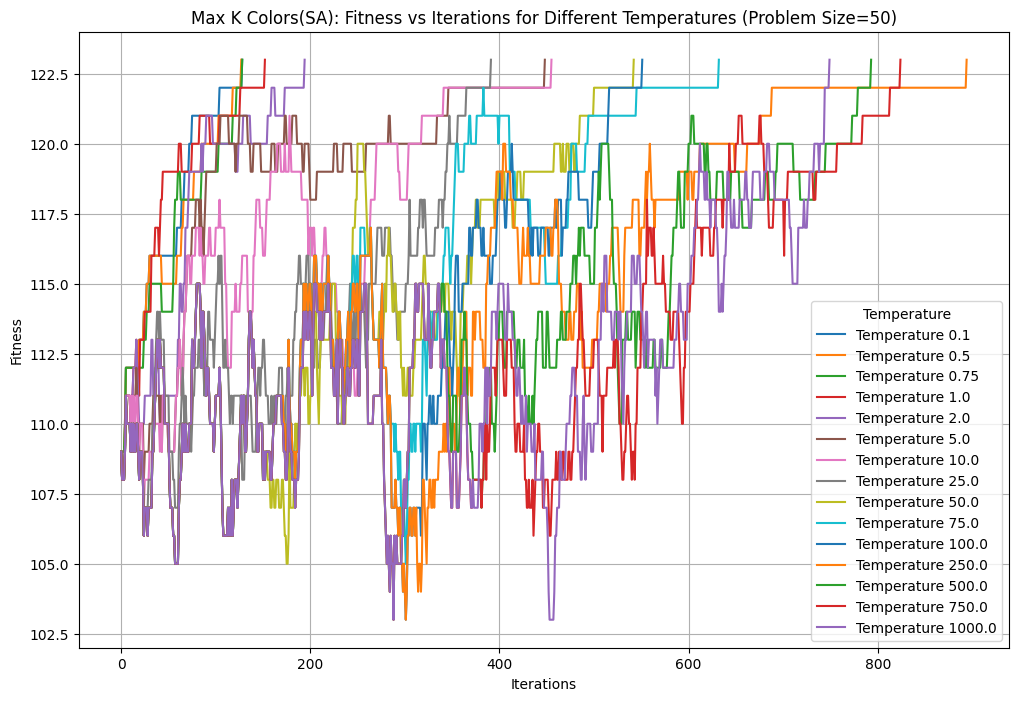

In [16]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df_temp_size100 = pd.read_csv('sa_maxKColor50_temp_results.csv')
    
    # Extract and handle temperature values correctly
    df_temp_size100['Temperature'] = df_temp_size100['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df_temp_size100['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df_temp_size100[df_temp_size100['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Max K Colors(SA): Fitness vs Iterations for Different Temperatures (Problem Size=50)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_maxKColor50_temp_results.csv')

In [20]:
df_temp_size50 = pd.read_csv('sa_maxKColor50_temp_results.csv')

best_fitness = df_temp_size50['Fitness'].max()
best_runs = df_temp_size50[df_temp_size50['Fitness'] == best_fitness]

HTML(best_runs.to_html())
# print(best_runs.shape) 

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
128,128,0.251305,123.0,217.0,0.10,2048
256,127,0.251045,123.0,209.0,0.50,2048
385,128,0.251305,123.0,217.0,0.75,2048
538,152,0.017651,123.0,246.0,1.00,2048
733,194,0.031078,123.0,341.0,2.00,2048
1182,448,0.044855,123.0,762.0,5.00,2048
1638,455,0.049991,123.0,806.0,10.00,2048
2030,391,0.016989,123.0,742.0,25.00,2048
2573,542,0.012549,123.0,1007.0,50.00,2048
3206,632,0.071796,123.0,1161.0,75.00,2048


In [18]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
4653,894,0.093872,123.0,1625.0,250.0,2048


Best initial temperature for nodes=50 is 250.

#### determine ideal temp for nodes=100

In [23]:
sa_runner = mlrose.SARunner(problem=maxKColor_problem_100,
                            experiment_name="SA_maxKColors100_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()
# sa_run_stats

In [24]:
sa_run_curves.describe()

,Iteration,Time,Fitness,FEvals,max_iters
count,10669.000000,10669.000000,10669.000000,10669.000000,10669.0
mean,406.134033,0.161854,218.230293,758.877683,2048.0
std,290.683683,0.105198,9.614081,539.559005,0.0
min,0.000000,0.000380,197.000000,0.000000,2048.0
25%,177.000000,0.067994,210.000000,332.000000,2048.0
50%,359.000000,0.142243,219.000000,667.000000,2048.0
75%,564.000000,0.252936,228.000000,1076.000000,2048.0
max,1367.000000,0.360437,230.000000,2438.000000,2048.0


In [25]:
sa_run_curves.to_csv('sa_maxKColor100_temp_results.csv', index=False)

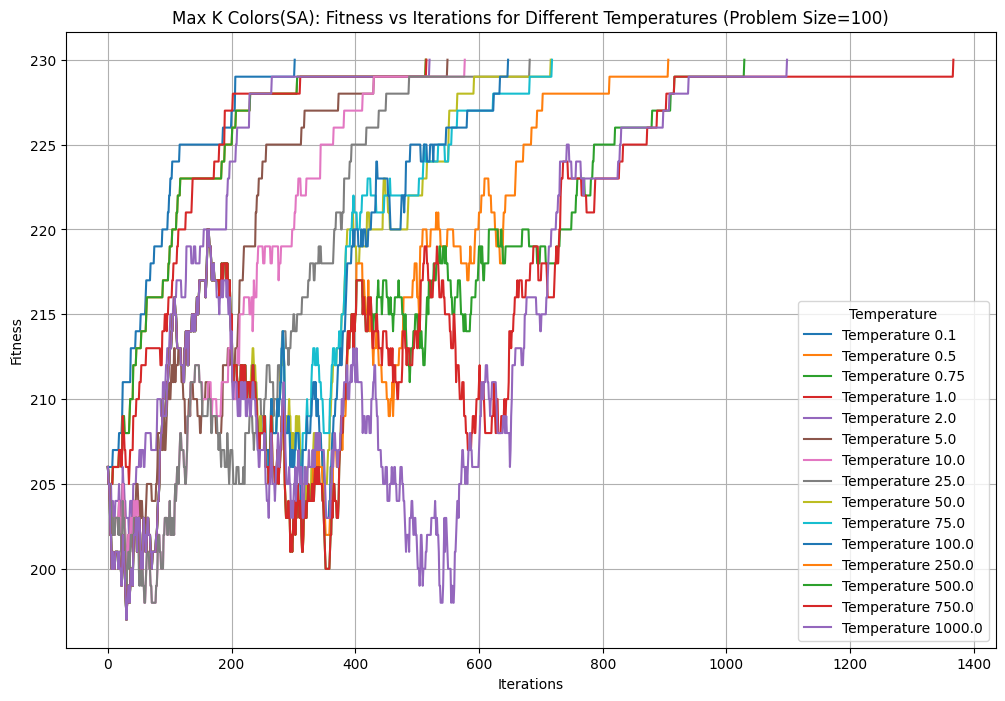

In [26]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df_temp_size100 = pd.read_csv('sa_maxKColor100_temp_results.csv')
    
    # Extract and handle temperature values correctly
    df_temp_size100['Temperature'] = df_temp_size100['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df_temp_size100['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df_temp_size100[df_temp_size100['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Max K Colors(SA): Fitness vs Iterations for Different Temperatures (Problem Size=100)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_maxKColor100_temp_results.csv')

In [27]:
df_temp_size50 = pd.read_csv('sa_maxKColor100_temp_results.csv')

best_fitness = df_temp_size50['Fitness'].max()
best_runs = df_temp_size50[df_temp_size50['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
302,302,0.360437,230.0,494.0,0.10,2048
817,514,0.117226,230.0,854.0,0.50,2048
1332,514,0.117226,230.0,854.0,0.75,2048
1848,515,0.117683,230.0,865.0,1.00,2048
2369,520,0.119925,230.0,888.0,2.00,2048
2919,549,0.131085,230.0,940.0,5.00,2048
3497,577,0.148311,230.0,1021.0,10.00,2048
4180,682,0.202099,230.0,1202.0,25.00,2048
4897,716,0.221584,230.0,1290.0,50.00,2048
5616,718,0.222319,230.0,1298.0,75.00,2048


In [28]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
9569,1367,0.034395,230.0,2438.0,750.0,2048


Best initial temperature for 100 nodes is 750.

#### determine ideal temp for nodes=25

In [29]:
sa_runner = mlrose.SARunner(problem=maxKColor_problem_25,
                            experiment_name="SA_maxKColors25_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose.GeomDecay])

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()
# sa_run_stats

In [30]:
sa_run_curves.describe()

,Iteration,Time,Fitness,FEvals,max_iters
count,5291.000000,5291.000000,5291.000000,5291.000000,5291.0
mean,239.779248,0.039091,49.734455,468.680212,2048.0
std,167.545655,0.026281,2.460036,330.269075,0.0
min,0.000000,0.000151,41.000000,0.000000,2048.0
25%,92.000000,0.021392,48.000000,179.500000,2048.0
50%,217.000000,0.030836,50.000000,422.000000,2048.0
75%,367.000000,0.049524,51.000000,717.000000,2048.0
max,639.000000,0.104774,55.000000,1261.000000,2048.0


In [31]:
sa_run_curves.to_csv('sa_maxKColor25_temp_results.csv', index=False)

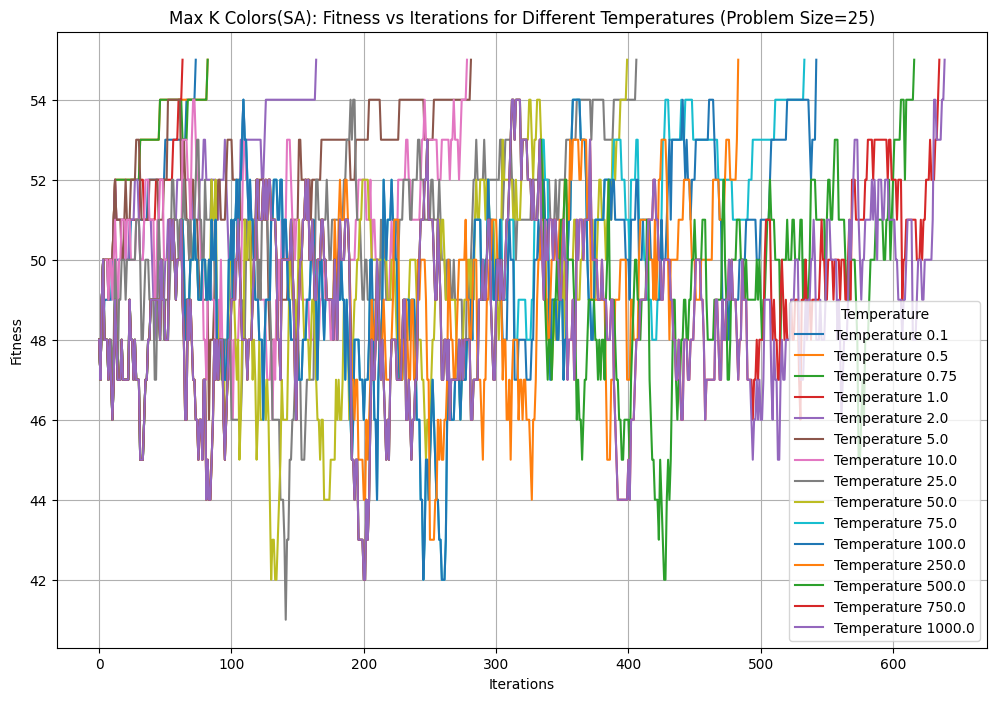

In [32]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df_temp_size100 = pd.read_csv('sa_maxKColor25_temp_results.csv')
    
    # Extract and handle temperature values correctly
    df_temp_size100['Temperature'] = df_temp_size100['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df_temp_size100['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df_temp_size100[df_temp_size100['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Max K Colors(SA): Fitness vs Iterations for Different Temperatures (Problem Size=25)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_maxKColor25_temp_results.csv')

In [33]:
df_temp_size50 = pd.read_csv('sa_maxKColor25_temp_results.csv')

best_fitness = df_temp_size50['Fitness'].max()
best_runs = df_temp_size50[df_temp_size50['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
73,73,0.104774,55.0,116.0,0.10,2048
156,82,0.028551,55.0,132.0,0.50,2048
239,82,0.028551,55.0,132.0,0.75,2048
303,63,0.101549,55.0,103.0,1.00,2048
468,164,0.011926,55.0,277.0,2.00,2048
750,281,0.024095,55.0,478.0,5.00,2048
1029,278,0.023725,55.0,520.0,10.00,2048
1436,406,0.031193,55.0,752.0,25.00,2048
1836,399,0.030243,55.0,765.0,50.00,2048
2370,533,0.027359,55.0,1002.0,75.00,2048


In [34]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
5290,639,0.056249,55.0,1261.0,1000.0,2048


Best initial temperature for a problem size of 50 is either 750 or 1000. Either option is fine because it returns the same fitness and FEval

## Genetic Algorithms (GA)

In [ ]:
from mlrose_hiive.runners import GARunner

## Randomized Hill Climbing (RHC)

In [ ]:
from mlrose_hiive.runners import RHCRunner